In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import platform

from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
from scipy.stats import *
from sklearn.preprocessing import *
from scipy import *
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df = pd.DataFrame(np.random.rand(5)) 
# 0~1 사이의 무작위수 -> 1차원 배열 -> 2차원 데이터 프레임
print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,0
0,0.946667
1,0.107374


In [9]:
df = pd.DataFrame(np.random.rand(3, 4))
# 0~1 사이의 무작위수 -> 2차원 행과 열이 있는 테이블 -> 2차원 데이터 프레임
## DataFrame : 배열 XX -> 배열은 Numpy

print(type(df))
df.head(2)

<class 'pandas.core.frame.DataFrame'>


,0,1,2,3
0,0.478993,0.609440,0.200405,0.276005
1,0.767994,0.536238,0.681499,0.079809


In [4]:
df = pd.DataFrame(np.random.randn(5))
# 평균 0, 표준편차 1인 정규분포 ==> -1 ~ 1 근처에 (-3~~ 이런식으로도 나옴)
df

,0
0,0.730819
1,-1.273355
2,-1.995580
3,-2.733565
4,0.006611


In [5]:
df = pd.DataFrame(np.random.randn(3, 4))
df

,0,1,2,3
0,1.975815,-0.733163,-0.055764,0.705256
1,-0.724537,-0.942539,-0.328861,-1.066713
2,-0.297517,-0.016566,-0.416115,1.152769


---

# 데이터 전처리
- 데이터를 분석에 사용할 때 **성능을 더 좋게 만들기 위해 데이터 수정 또는 형태 변형**을 수행하는 과정
- 분석 목적에 맞게 데이터의 품질을 확인하고, 필요 시 품질을 높이기 위한 필터링 작업 포함
- **데이터 품질 요소**: 신뢰성, 정확성, 적시성(시의성) 등

---

## 데이터 전처리를 하는 이유
1. 수집한 데이터를 머신러닝 등에 **바로 사용할 수 있는 경우는 거의 없음**
2. 데이터 크기가 너무 크면 한 번에 분석하기 어려우므로 **적절히 축소** 필요
3. 잘못된 값, 이상치, 결측치(NaN) 등을 **처리해야 함**
4. 비정형 데이터라면 이를 **정형 데이터로 변환**해야 함

> **Note:** 파이썬으로 데이터 분석을 하려면 반드시 **정형 데이터** 형태여야 한다.
--- 

## 전처리 유형

1. **데이터 누락**
   - 중간에 데이터가 빠진 경우 (결측치 처리 필요)
     
2. **잘못된 값**
   - 틀린 값, 비현실적인 값 등이 들어 있는 경우 (오타, 잘못된 범위 값 등)
    
3. **단위 불일치**
   - 데이터 단위가 서로 다른 경우 (예: m ↔ inch, kg ↔ 파운드)
     
4. **결측치(NaN) 및 이상치 처리** <중요도 ↑>
   - NaN 값 보정 또는 제거
   - 이상치(Outlier) 탐지 및 처리
     
5. **범주형 데이터 변환**
   - 문자열 기반의 범주형 데이터를 숫자형 표현으로 변경 필요  
   - 예시:  
     - 요일 → 월요일=1, 화요일=2, …  
     - 성별 → 남성=0, 여성=1

---

## 데이터 변환

### 1. 로그 변환 (Log Transformation) 
- **정의**: 데이터에 로그 함수(ln, log10 등)를 적용
- **효과**:
  - 큰 값을 줄이고 작은 값의 차이를 확대 → 분포를 안정화
  - 분포가 한쪽으로 치우친 경우(오른쪽 긴 꼬리, positive skew) 정규 분포에 가깝게 만듦
- **예시**: 집값, 소득, 매출처럼 값의 범위가 큰 데이터를 log 변환 + 사람이 느끼는 오감


### 2. 역수 변환 (Reciprocal Transformation)
- 역수를 사용하면 선형적인 특성을 가져 분석의 정확도가 높아지는 경우
- 역수 관계: 자동차의 성능 지표
  - 자동차 마일리지(연료 1l로 가는 거리 km)
  - 연비

### 3. 정규 분포로 변환 (Normalization to Normal Distribution)
- **정의**: 데이터를 통계적 기법으로 변형하여 정규 분포(가우시안 분포)에 맞추는 방법
- **방법**:
  - Box-Cox 변환 (양수 데이터만 가능)
  - Yeo-Johnson 변환 (음수, 0 포함 가능)
- **효과**:
  - 정규성을 확보해 선형 회귀, ANOVA, t-test 등에서 가정 충족
  - 머신러닝 알고리즘의 학습 성능 향상

** 변환 목적: 선형시스템이어야 정확한 예측 가능

---

## 데이터 전처리 – 전처리 유형

| 구분 | 처리 방법 |
|------|------------|
| **결측치 (missing) 처리** | - 결측치가 포함된 항목을 **모두 버리는 방법**<br>  → 단, 비중이 크면 무시하기 어려움<br>- 결측치를 **적절한 값으로 대체**<br>  → 예: 0, 평균값, 최소값, 특정 상수, 인접 값 등으로 추정 보정<br>- **분석 단계로 결측치 처리 넘김** (NA로 표기)<br>- 별도의 범주형 변수를 정의하여 추적 가능하게 관리 |
| **틀린 값 (invalid) 처리** | - 틀린 값이 포함된 항목을 **모두 버리는 방법**<br>- 틀린 값을 **다른 적절한 값으로 대체**<br>- **분석 단계로 틀린 값 처리 넘김** |
| **이상치 (outlier) 검출** | - 값이 일반적인 범위를 벗어나 특별한 값을 갖는 경우<br>- 데이터 분석 과정의 활동이므로 **분석 단계로 넘김**<br>- 예: 도난 카드 사용, 불법 보험료 청구 등 |

---


In [11]:
df = pd.DataFrame({'A':[1, 2, np.nan, 4, 5],
                   'B':[6, 7, 8,np.nan, 10],
                   'C':[11, 12, 13, np.nan, np.nan]})
df

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,NaN,8.0,13.0
3,4.0,NaN,NaN
4,5.0,10.0,NaN


In [12]:
pd.isna(df)

,A,B,C
0,False,False,False
1,False,False,False
2,True,False,False
3,False,True,True
4,False,False,True


In [14]:
pd.isna(df).sum() # 열 단위로 결측치 개수 세기

A    1
B    1
C    2
dtype: int64

In [21]:
dropDf = df.dropna()
dropDf

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0


In [22]:
dfAll = df.fillna(0)
dfAll

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,0.0,8.0,13.0
3,4.0,0.0,0.0
4,5.0,10.0,0.0


In [18]:
dfC=df['C'].fillna(0)
dfC

0    11.0
1    12.0
2    13.0
3     0.0
4     0.0
Name: C, dtype: float64

In [19]:
dfA = df['A'].fillna('Missing')
dfA

0        1.0
1        2.0
2    Missing
3        4.0
4        5.0
Name: A, dtype: object

In [20]:
dfM = df.fillna(df.mean())
dfM

,A,B,C
0,1.0,6.00,11.0
1,2.0,7.00,12.0
2,3.0,8.00,13.0
3,4.0,7.75,12.0
4,5.0,10.00,12.0


In [23]:
dfUp = df.fillna(method='ffill') # 위의 값으로 대체
dfUp

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,2.0,8.0,13.0
3,4.0,8.0,13.0
4,5.0,10.0,13.0


In [25]:
dfDown=df.fillna(method='bfill') # 아래 값으로 대체
dfDown

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,4.0,8.0,13.0
3,4.0,10.0,NaN
4,5.0,10.0,NaN


In [26]:
dfCO = df.fillna({'A':df['A'].mean(), 'B':'12/15', 'C':'Missing'})
dfCO

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,3.0,8.0,13.0
3,4.0,12/15,Missing
4,5.0,10.0,Missing


In [27]:
test = {'A':df['A'].min(), 'B':'5/4', 'C':'M'}
dfCO2 = df.fillna(value=test)
dfCO2

,A,B,C
0,1.0,6.0,11.0
1,2.0,7.0,12.0
2,1.0,8.0,13.0
3,4.0,5/4,M
4,5.0,10.0,M



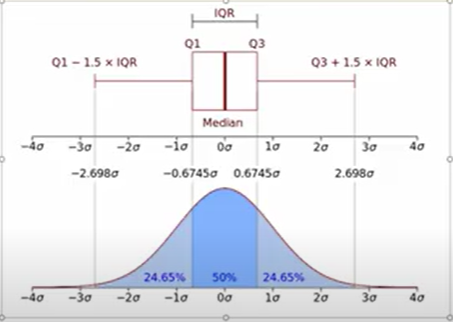

# 데이터 전처리 – 이상치 처리

- **Q1**: 데이터의 첫 번째 사분위수 (25번째 백분위수)
- **Q2**: 데이터의 두 번째 사분위수 (중앙값, 50번째 백분위수)
- **Q3**: 데이터의 세 번째 사분위수 (75번째 백분위수)

---

## IQR (Interquartile Range)
- 정의: **제1사분위수(Q1)에서 제3사분위수(Q3)까지의 거리**
- 계산식: `IQR = Q3 - Q1`

---

## 이상치 기준
- **최소값 경계**: `Q1 - 1.5 × IQR`
- **최대값 경계**: `Q3 + 1.5 × IQR`

-> 위 범위를 벗어난 데이터는 **이상치(outlier)** 로 간주하여 제거

---

## 정리
- IQR의 1.5배보다 멀리 떨어진 데이터 = 이상치
- 최소 경계보다 작은 값, 최대 경계보다 큰 값 → 모두 이상치로 처리

---


# 데이터 전처리 – 범주형으로 변환

## 1. 필요성
- 수치형 데이터의 **개별 값 구분이 오히려 혼란스러울 경우** 범주형으로 변환
  - 예시:
    - 나이: 10대, 20대, 30대, 40대 …
    - 연간 소득: 고소득층, 중간층, 저소득층 등

---

## 2. 범주형 변환 방식
- **각 구간의 범위를 균등하게** 정할 수 있음  
- 또는 **서로 다른 범위**를 설정할 수도 있음  

### 예시
- 고교 내신 성적:
  - 1등급 / 9등급 (각 4%)
  - 2등급 / 8등급 (15%) 등


In [34]:
dfA2 = pd.read_csv('../sources/Data/대전지하수.csv')
dfA2.head(4)

,Date,temp,level,EC
0,2009-01-01 00:00:00,16.1,44.47,749
1,2009-01-01 01:00:00,16.1,44.47,749
2,2009-01-01 02:00:00,16.1,44.47,749
3,2009-01-01 03:00:00,16.1,44.47,749


In [35]:
dfA = pd.read_csv('../sources/Data/대전지하수.csv',
                  index_col='Date', # Date 열을 인덱스로 처리
                  parse_dates=True, 
                  encoding='cp949') # csv나 엑셀은 cp949
dfA.head(4)

,temp,level,EC
Date,,,
2009-01-01 00:00:00,16.1,44.47,749
2009-01-01 01:00:00,16.1,44.47,749
2009-01-01 02:00:00,16.1,44.47,749
2009-01-01 03:00:00,16.1,44.47,749


In [37]:
dfA.describe()

,temp,level,EC
count,69548.000000,69548.000000,69548.000000
mean,16.262491,44.295353,727.024027
std,0.089778,2.539464,51.544590
min,15.800000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.500000,45.900000,778.000000


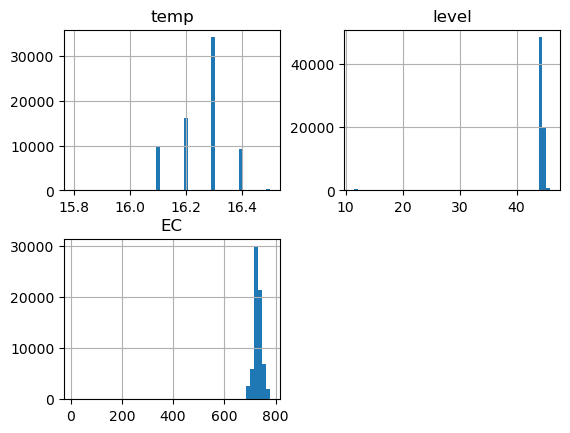

In [40]:
dfA.hist(bins=50)
plt.show()

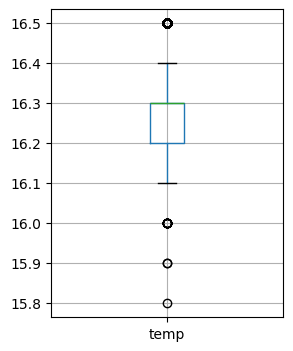

In [45]:
dfA.boxplot(column='temp', figsize=(3,4))
plt.show()

In [51]:
Q1 = dfA['temp'].quantile(q=0.25)
Q2 = dfA['temp'].quantile(q=0.50)
Q3 = dfA['temp'].quantile(q=0.75)

IQR = Q3 - Q1

upData = Q3 + 1.5 * IQR
downData = Q1 - 1.5 * IQR

print(Q1, Q2, Q3, IQR)
print(upData, downData)
dfA['temp'].shape

16.2 16.3 16.3 0.10000000000000142
16.450000000000003 16.049999999999997


(69548,)

In [50]:
fillData = dfA[(dfA['temp'] < upData ) & (dfA['temp'] > downData)]
fillData.shape

(69306, 3)

In [52]:
fillData.describe()

,temp,level,EC
count,69306.000000,69306.000000,69306.000000
mean,16.261775,44.294800,726.961100
std,0.088793,2.543865,51.555575
min,16.100000,11.530000,13.000000
25%,16.200000,44.370000,722.000000
50%,16.300000,44.460000,730.000000
75%,16.300000,44.550000,742.000000
max,16.400000,45.900000,778.000000


In [54]:
n_samples = 10
height = 3 * np.random.randn(n_samples).round() + 170
# 평균 170, 표준편차 3 의미

nationality = np.random.randint(0, 3, n_samples)
# 0, 1, 2 만 추출 -> ex)국가명 0-한국, 1-미국, 2-일본 

print(height)
print(nationality)

[167. 170. 173. 170. 173. 173. 170. 170. 173. 173.]
[0 1 2 2 2 1 2 0 0 1]


In [55]:
type(zip(height, nationality))

## concat --> Pandas 데이터프레임에서 열 단위 또는 행 단위로 합치기
## zip --> Numpy 배열에서 열 단위로 합치기

zip

In [59]:
list(zip(height, nationality))

[(np.float64(167.0), np.int32(0)),
 (np.float64(170.0), np.int32(1)),
 (np.float64(173.0), np.int32(2)),
 (np.float64(170.0), np.int32(2)),
 (np.float64(173.0), np.int32(2)),
 (np.float64(173.0), np.int32(1)),
 (np.float64(170.0), np.int32(2)),
 (np.float64(170.0), np.int32(0)),
 (np.float64(173.0), np.int32(0)),
 (np.float64(173.0), np.int32(1))]

In [66]:
df = pd.DataFrame(list(zip(height, nationality)), columns=["height", "nationality"])
df.head(2)

,height,nationality
0,167.0,0
1,170.0,1


In [60]:
nat = pd.get_dummies(df['nationality'], prefix='nat_')
# 더미 데이터 생성 - 기존 데이터 기반으로 0 1 2 카테고리 생성
# ex) nationality가 0 이면 nat_0 만 True, 1이면 nat_1만 True...
nat

,nat__0,nat__1,nat__2
0,True,False,False
1,False,True,False
2,False,False,True
3,False,False,True
4,False,False,True
5,False,True,False
6,False,False,True
7,True,False,False
8,True,False,False
9,False,True,False


In [61]:
new_df = pd.concat([df, nat], axis=1)
new_df

,height,nationality,nat__0,nat__1,nat__2
0,167.0,0,True,False,False
1,170.0,1,False,True,False
2,173.0,2,False,False,True
3,170.0,2,False,False,True
4,173.0,2,False,False,True
5,173.0,1,False,True,False
6,170.0,2,False,False,True
7,170.0,0,True,False,False
8,173.0,0,True,False,False
9,173.0,1,False,True,False


In [62]:
df = pd.DataFrame(['서울','경기','경기','서울','부산'], columns=['지역'])
df

,지역
0,서울
1,경기
2,경기
3,서울
4,부산


In [63]:
pd.get_dummies(df)

,지역_경기,지역_부산,지역_서울
0,False,False,True
1,True,False,False
2,True,False,False
3,False,False,True
4,False,True,False


In [64]:
new_df.drop('nationality', axis=1, inplace=True)
new_df

,height,nat__0,nat__1,nat__2
0,167.0,True,False,False
1,170.0,False,True,False
2,173.0,False,False,True
3,170.0,False,False,True
4,173.0,False,False,True
5,173.0,False,True,False
6,170.0,False,False,True
7,170.0,True,False,False
8,173.0,True,False,False
9,173.0,False,True,False


In [65]:
nat_categ = pd.Categorical(nationality)
nat_categ

[0, 1, 2, 2, 2, 1, 2, 0, 0, 1]
Categories (3, int32): [0, 1, 2]

# ↑ One-Hot Encoding

## 정의
- 하나의 특성(컬럼)만 1이 될 수 있고, 다른 특성은 모두 0으로 코딩하는 방법
- 범주형 변수를 머신러닝 알고리즘에서 사용할 수 있도록 수치화하는 방식

---

## 예시
- **월요일**: [1, 0, 0, 0, 0, 0, 0]  
- **수요일**: [0, 0, 1, 0, 0, 0, 0]  

---

## 구현 (pandas)
- `pd.get_dummies()` 사용
- 범주형 변수를 자동으로 **one-hot encoding** 형태로 변환해줌


데이터 프레임 -> 열이름

데이터셋 -> feature

# 데이터 전처리 – 표준화 (Standardization)

## 표준화란?
- 데이터 분포를 **평균 0, 표준편차 1**이 되도록 변환하는 데이터 전처리 기법
- 여러 개의 변수가 있을 때, 서로 다른 변수들을 비교하기 편리하게 만들어줌

---

## Z 점수 (Z-score)
- 어떤 값이 평균에서 **얼마나 떨어져 있는지**를 나타내는 수치
- 정의:
  - 확률변수 X가 평균 μ(뮤)로부터 표준편차 σ(시그마)의 몇 배만큼 떨어져 있는지를 나타냄
  - 공식:  
    $$
    Z = \frac{X - \mu}{\sigma}
    $$
- **Z 점수** = 표준화 점수, 표준 점수라고도 함


## !!<중요>
# 데이터 전처리 – ★ 스케일링 (Scaling) 

## 정의
- 원래 데이터가 갖는 **값의 범위를 다르게 조정**하는 작업
- 즉, 기준점을 같게 만드는 과정

---

## 스케일링을 하는 이유
- 여러 특성 변수의 **중요도를 같도록** 맞추기 위해서
- 예시:
  - 모든 시험을 100점 만점으로 환산하면 동일한 비중으로 취급됨
  - 어떤 과목은 50점 만점, 어떤 과목은 80점 만점이면 동일한 조건으로 비교하기 어려움

---

## 스케일링 방법

### 1. 최소–최대 스케일링 (Min-Max Scaling)
- 주어진 값을 **최소값=0, 최대값=1** 범위로 재조정
- 사용 함수: `MinMaxScaler()` (scikit-learn)

### 2. 표준 스케일링 (Standard Scaling)
- 데이터 분포를 **표준 정규분포(평균=0, 표준편차=1)** 로 정규화
- 표준화(standardization), z-score 정규화
- 사용 함수: `StandardScaler()` (scikit-learn)


# 데이터 전처리 – 스케일링 종류와 사용

## 스케일링 종류
- **StandardScaler**
  - 기본 스케일링
  - 평균 0, 표준편차 1 사용
- **MinMaxScaler**
  - 최소값/최대값을 각각 0, 1이 되도록 스케일링
- **MaxAbsScaler**
  - 최대 절댓값을 기준으로 -1, 1 범위에 맞춰 스케일링
- **RobustScaler**
  - 중앙값(median)과 IQR(interquartile range)을 사용
  - 이상치(outlier)의 영향을 최소화

---

## 사용 예시 (scikit-learn)

```python
from sklearn.preprocessing import StandardScaler

# 1) 스케일링 라이브러리 호출
scaler = StandardScaler()  

# 2) 사용할 스케일링 객체 선언
# scaler = MinMaxScaler()
# scaler = MaxAbsScaler()
# scaler = RobustScaler()

# 3) 훈련 데이터에 fit 적용 (평균, 표준편차 계산)
scaler.fit(train_data)

# 4) fit된 scaler를 이용하여 데이터 변환
train_scaled = scaler.transform(train_data)


In [74]:
n_samples = 10
height = 3 * np.random.randn(n_samples).round() + 170
weight = np.random.randint(0, 3, n_samples) + 70
X = pd.DataFrame(list(zip(height, weight)))
X.head(3)

,0,1
0,170.0,72
1,167.0,70
2,161.0,72


In [72]:
from sklearn.preprocessing import StandardScaler
a = StandardScaler() # 1)표준 스케일링을 하기 위해서 표준 스케일링을 객체로 생성
b = a.fit(X)         # 2) 1에 데이터 X를 타입을 맞춤
c = a.transform(X)   # 3) 데이터 X를 표준스케일링 1에 맞게 변형

print(b)
print(c)

StandardScaler()
[[ 0.91766294  0.14285714]
 [ 0.91766294  0.14285714]
 [-1.3764944   0.14285714]
 [-1.3764944   0.14285714]
 [-0.22941573  1.57142857]
 [-1.3764944   0.14285714]
 [ 0.91766294 -1.28571429]
 [ 0.91766294  1.57142857]
 [ 0.91766294 -1.28571429]
 [-0.22941573 -1.28571429]]


In [87]:
XS1 = StandardScaler().fit_transform(X)
print("스탠다드\n",XS1)
print(type(XS1))

XS2 = MinMaxScaler().fit_transform(X) #최소 0, 최대 1
print("\nMinMaxScaler\n", XS2)

XS3 = MaxAbsScaler().fit_transform(X)
print("\nMaxAbsScaler\n", XS3)

XS4 = RobustScaler().fit_transform(X)
print("\nRobustScaler\n", XS4)

스탠다드
 [[ 0.33333333  0.89625816]
 [-0.5        -1.66447944]
 [-2.16666667  0.89625816]
 [-0.5         0.89625816]
 [ 1.16666667 -0.38411064]
 [ 1.16666667  0.89625816]
 [ 0.33333333 -0.38411064]
 [-0.5        -0.38411064]
 [ 1.16666667 -1.66447944]
 [-0.5         0.89625816]]
<class 'numpy.ndarray'>

MinMaxScaler
 [[0.75 1.  ]
 [0.5  0.  ]
 [0.   1.  ]
 [0.5  1.  ]
 [1.   0.5 ]
 [1.   1.  ]
 [0.75 0.5 ]
 [0.5  0.5 ]
 [1.   0.  ]
 [0.5  1.  ]]

MaxAbsScaler
 [[0.98265896 1.        ]
 [0.96531792 0.97222222]
 [0.93063584 1.        ]
 [0.96531792 1.        ]
 [1.         0.98611111]
 [1.         1.        ]
 [0.98265896 0.98611111]
 [0.96531792 0.98611111]
 [1.         0.97222222]
 [0.96531792 1.        ]]

RobustScaler
 [[ 0.28571429  0.5       ]
 [-0.28571429 -1.5       ]
 [-1.42857143  0.5       ]
 [-0.28571429  0.5       ]
 [ 0.85714286 -0.5       ]
 [ 0.85714286  0.5       ]
 [ 0.28571429 -0.5       ]
 [-0.28571429 -0.5       ]
 [ 0.85714286 -1.5       ]
 [-0.28571429  0.5       ]]


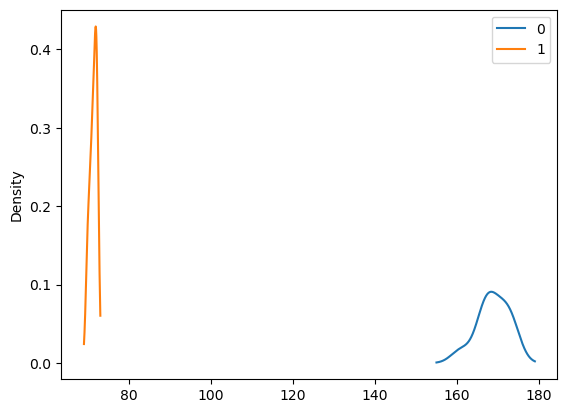

In [101]:
X.plot.kde()
plt.show()

c, XS1~4까지는 모두 numpy 이기 때문에 불가능

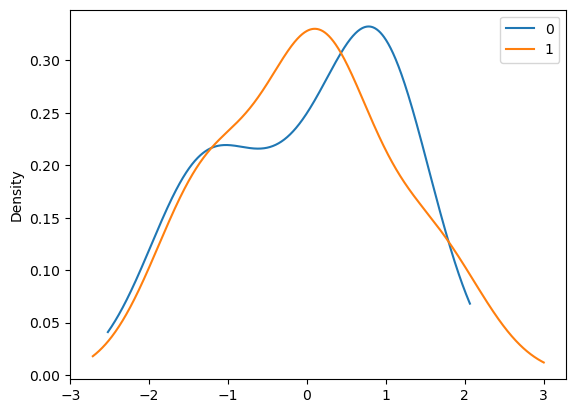

In [88]:
cp = pd.DataFrame(c)
cp.plot.kde()
plt.show()

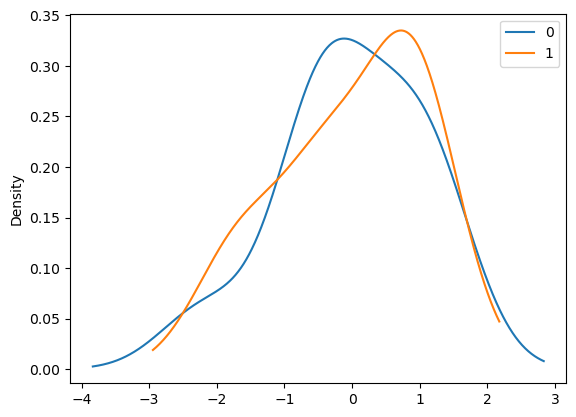

In [93]:
XS1p = pd.DataFrame(XS1)
XS1p.plot.kde()
plt.show()

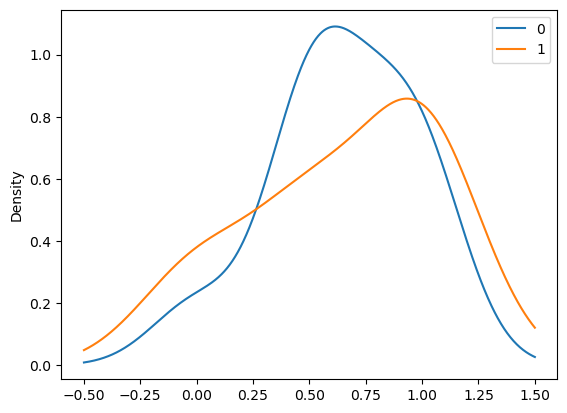

In [94]:
XS2p = pd.DataFrame(XS2)
XS2p.plot.kde()
plt.show()

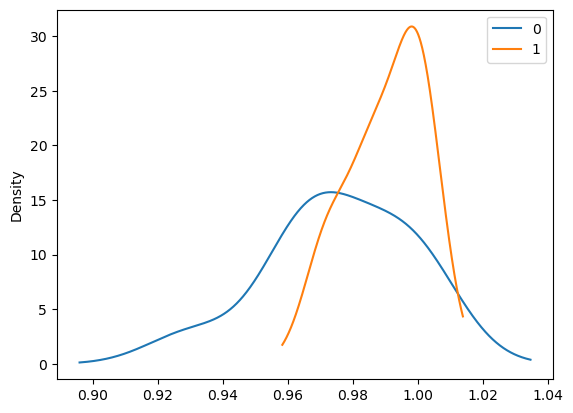

In [95]:
XS3p = pd.DataFrame(XS3) #사용하면 안되는 모습
XS3p.plot.kde()
plt.show()

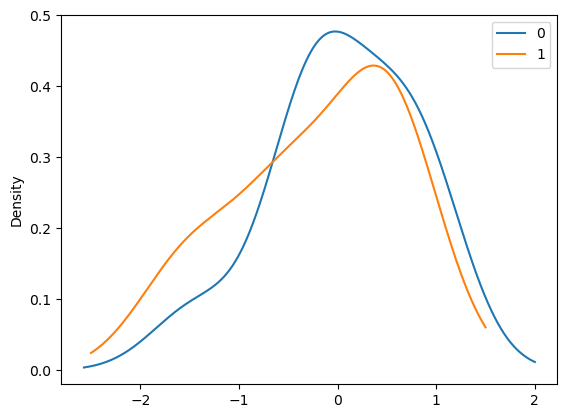

In [96]:
XS4p = pd.DataFrame(XS4)
XS4p.plot.kde()
plt.show()

            x1        x2         x3
0    -2.510297  9.006946 -11.363455
1     0.127859  8.747625  -6.340222
2    -0.769576  6.781474   1.472698
3    -0.970968  8.887988  -0.507571
4     1.435274  1.774373  -5.089091
...        ...       ...        ...
9995 -5.627554  5.856690   1.409166
9996 -0.442160  5.638629  -7.585166
9997 -1.548362  6.151858 -12.932907
9998  0.543567  1.590875  -3.821395
9999  2.745678  7.104048  -5.990051

[10000 rows x 3 columns]


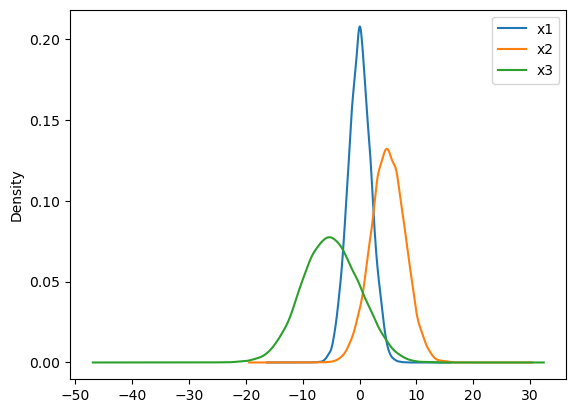

In [104]:
df = pd.DataFrame({
    'x1': np.random.normal(0, 2, 10000), # (평균, 표준편차, 갯수)
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})
print(df)
df.plot.kde()
plt.show()

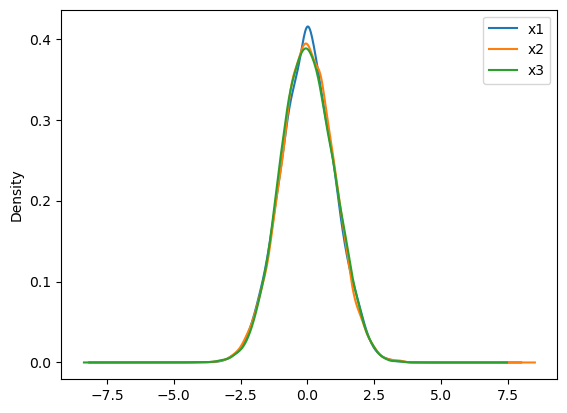

In [105]:
data_tf = StandardScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()
plt.show()

            x1        x2        x3
0    -1.270674  1.349286 -1.273083
1     0.050084  1.262352 -0.270428
2    -0.399205  0.603224  1.289059
3    -0.500029  1.309407  0.893790
4     0.704624 -1.075345 -0.020698
...        ...       ...       ...
9995 -2.831287  0.293202  1.276378
9996 -0.235288  0.220099 -0.518923
9997 -0.789094  0.392153 -1.586351
9998  0.258203 -1.136861  0.232339
9999  1.360661  0.711363 -0.200532

[10000 rows x 3 columns]
            x1        x2        x3
0     0.352189  0.642134  0.396105
1     0.515895  0.631709  0.522883
2     0.460207  0.552669  0.720069
3     0.447709  0.637352  0.670090
4     0.597025  0.351382  0.554460
...        ...       ...       ...
9995  0.158752  0.515492  0.718466
9996  0.480524  0.506726  0.491463
9997  0.411880  0.527358  0.356494
9998  0.541692  0.344005  0.586454
9999  0.678340  0.565637  0.531721

[10000 rows x 3 columns]


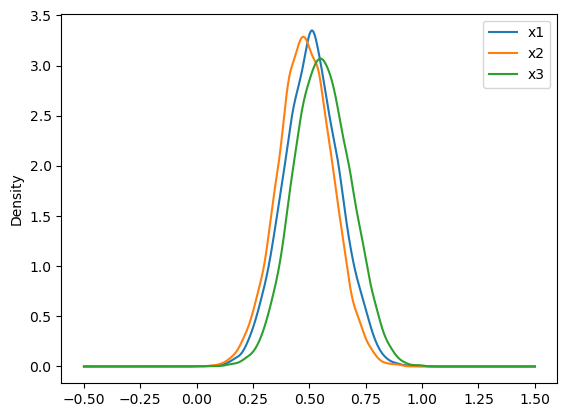

In [106]:
print(df) # 원본데이터

data_tf = MinMaxScaler().fit_transform(df) # 결과는 Numpy
df = pd.DataFrame(data_tf, columns=['x1','x2','x3']) # 데이터프레임으로 변경

print(df) # 스케일링 된 데이터
df.plot.kde()
plt.show()

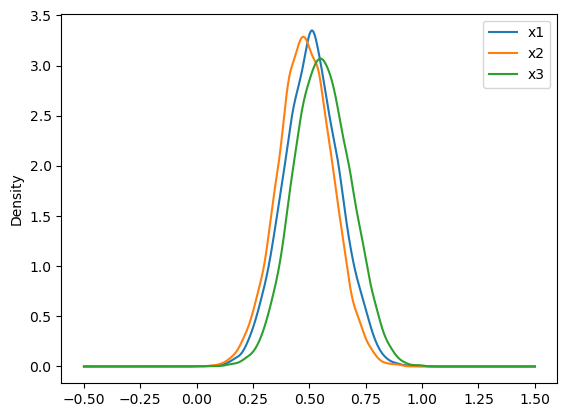

In [107]:
data_tf = MaxAbsScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()
plt.show()

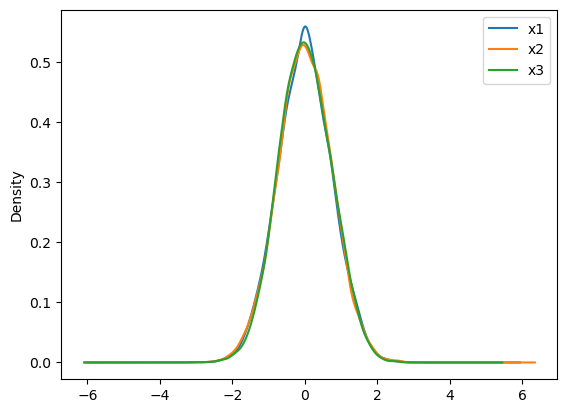

In [108]:
data_tf = RobustScaler().fit_transform(df)
df = pd.DataFrame(data_tf, columns=['x1','x2','x3'])
df.plot.kde()
plt.show()